In [ ]:
#Import necessary libraries for our model
import pandas as pd

In [ ]:
#1: Read the dataset and assess it's features
from google.colab import files

uploaded_files = files.upload() #read dataset (two separate files)

file_name = list(uploaded_files.keys())  #get the name of the uploaded file
application_record = pd.read_csv(file_name[0]) #read the datasets using panda's read_csv function
credit_record = pd.read_csv(file_name[1])

#Print some informations regarding our dataset

#First dataset: application_record.csv
#Display the first few rows of the dataset
print("Dataset Preview:")
print(application_record.head())

print("\nDataset Summary:") #Check basic statistics
print(application_record.describe())

print("\nMissing Values in Each Column:") #Check for missing values
print(application_record.isnull().sum())

#Second dataset: credit_record.csv
#Display the first few rows of the dataset
print("Dataset Preview:")
print(credit_record.head())

print("\nDataset Summary:") #Check basic statistics
print(credit_record.describe())

print("\nMissing Values in Each Column:") #Check for missing values
print(credit_record.isnull().sum())

Saving application_record.csv to application_record (2).csv
Saving credit_record.csv to credit_record (2).csv
Dataset Preview:
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

 

In [ ]:
#Check other relevant aspects about the uploaded dataset

print(f"For application_record.csv, the number of unique IDs is: {len(set(application_record['ID']))}, while the total number of records is: {len(application_record['ID'])}")
print(f"\nFor credit_record.csv, the number of unique IDs is: {len(set(credit_record['ID']))}")
print(f"\nChecking the IDs available in both datasets: {len(set(application_record['ID']).intersection(set(credit_record['ID'])))}")


For application_record.csv, the number of unique IDs is: 438510, while the total number of records is: 438557

For credit_record.csv, the number of unique IDs is: 45985

Checking the IDs available in both datasets: 36457


Observed issues: duplicated rows, for the first part of the dataset we have missing values for a column, and we have unlabeled data, so we must come to a common value as to distinguish between "good" and "bad" for credit approval. Solutions: drop duplicate rows, and drop the missing values column to see if it influences the results

In [ ]:
#drop duplicates
application_record = application_record.drop_duplicates()

# Check missing values
print("Missing values per column:")
print(application_record.isnull().sum())

# Fill missing values for a numerical column
#data['affected_column'] = data['affected_column'].fillna(data['affected_column'].mean())  # Replace 'mean' with 'median' if needed

#OCCUPATION_TYPE was the column with missing values, and after a further inspection, the column contains categorical values, so replace them with "Unknown"
application_record['OCCUPATION_TYPE'] = application_record['OCCUPATION_TYPE'].fillna('Unknown')


Missing values per column:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000

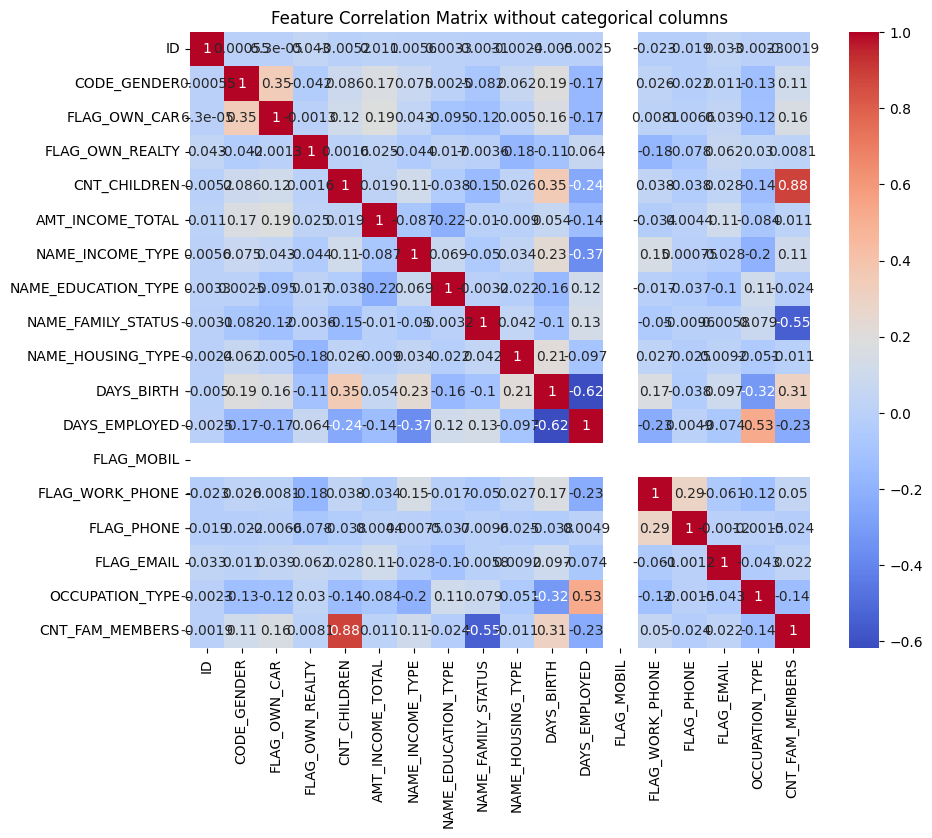

In [ ]:
#3. Preprocessing and feature corellation
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Summary statistics for numerical columns
print(application_record.describe())

# Identify categorical columns by data type
categorical_columns = application_record.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns (by data type):")
print(categorical_columns)

# Identify numerical columns
numerical_cols = application_record.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:")
print(numerical_cols)

# Value counts for categorical columns
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(application_record[col].value_counts())

#10. Apply label encoding to categorical columns
label_encoders = {}  # To store encoders for future use
for col in categorical_columns:
    le = LabelEncoder()
    application_record[col] = le.fit_transform(application_record[col])
    label_encoders[col] = le  # Save encoder for potential reverse mapping

# Verify encoding
print("\nEncoded Categorical Columns:")
print(application_record[categorical_columns].head())

#12. Standardize numerical features
scaler = StandardScaler()
application_record[numerical_cols] = scaler.fit_transform(application_record[numerical_cols])

# Verify scaling
print("\nScaled Numerical Features:")
print(application_record[numerical_cols].head())

#13. Final verification
print("\nTotal Missing Values:", application_record.isnull().sum().sum())  # Should be 0
print("Remaining Object Columns:", application_record.select_dtypes(include=['object']).columns)
print(application_record[numerical_cols].describe())

# Correlation matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#1. exclude categorical columns
# Select only numerical columns
#numerical_data = application_record.select_dtypes(include=['number'])

# Compute correlation matrix
#correlation_matrix = numerical_data.corr()
correlation_matrix = application_record.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix without categorical columns")
plt.show()

#2. Include categorical columns, encoded as follows
# One-hot encode categorical columns
# encoded_data = pd.get_dummies(application_record, drop_first=True)

# # Compute correlation matrix
# correlation_matrix_dum = encoded_data.corr()

# # Filter the correlation matrix for high correlations
# threshold = 0.5
# filtered_corr = correlation_matrix_dum[
#     (correlation_matrix_dum >= threshold) | (correlation_matrix_dum <= -threshold)
# ]

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(filtered_corr, annot=True, cmap='coolwarm')
# plt.title("Feature Correlation Matrix with encoded categorical columns")
# plt.show()


Feature engineering: determine the pairs that have the highest corellation


New columns:
Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CNT_FAM_MEMBERS_plus_CNT_CHILDREN',
       'OCCUPATION_TYPE_plus_DAYS_EMPLOYED', 'DAYS_BIRTH_plus_CNT_CHILDREN',
       'CNT_FAM_MEMBERS_plus_DAYS_BIRTH', 'FLAG_OWN_CAR_plus_CODE_GENDER'],
      dtype='object')
Combined features added:
         ID  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  \
0 -1.772757                1          2.179879                 4   
1 -1.772755                1          2.179879                 4   
2 -1.772753                1         -0.681502                 4   
3 -1.772750                1          0.749189                 0   
4 -1.772748                1          0.749189              

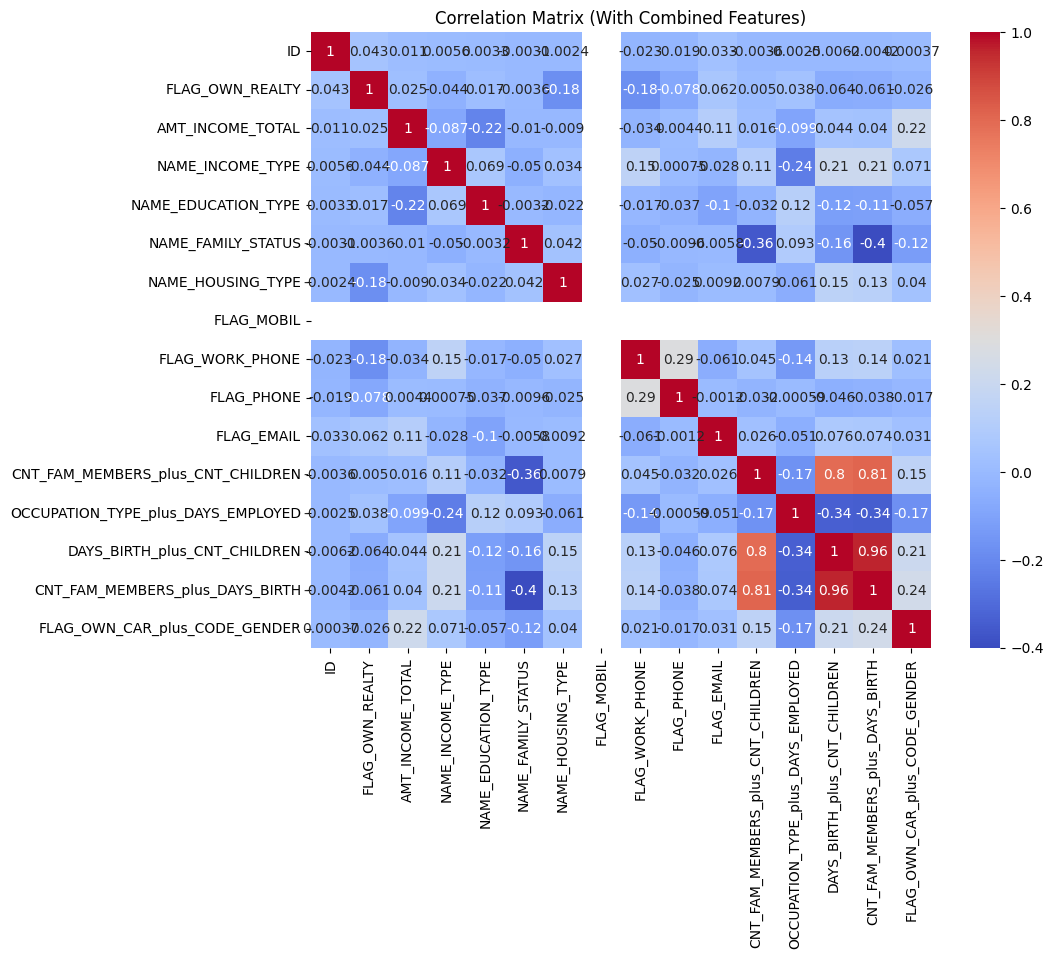

In [ ]:
#Save a copy of the dataset
# application_record.to_csv('preprocessed_application_record.csv', index=False)
# prev_dataset = application_record.copy()

#1. For numerical columns only
#high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
#Get the upper triangle of the correlation matrix
# upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# high_corr_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False)
# high_corr_pairs = high_corr_pairs[high_corr_pairs < 1.0]  # Exclude self-correlation
# print("Highly correlated pairs:\n", high_corr_pairs[high_corr_pairs > 0.3])

#Lets combine the features into a single one, and train on the model as that
#Example correlated pairs
correlated_pairs = [
    ('CNT_FAM_MEMBERS', 'CNT_CHILDREN'),
    ('OCCUPATION_TYPE', 'DAYS_EMPLOYED'),
    ('DAYS_BIRTH', 'CNT_CHILDREN'),
    ('CNT_FAM_MEMBERS', 'DAYS_BIRTH'),
    ('FLAG_OWN_CAR', 'CODE_GENDER')
]

# Combine features by averaging
for feature1, feature2 in correlated_pairs:
    new_feature = f"{feature1}_plus_{feature2}"
    application_record[new_feature] = (application_record[feature1] + application_record[feature2]) / 2

print("New columns:")
print(application_record.columns)

# Optionally, drop the original features
application_record = application_record.drop(columns=['CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'DAYS_BIRTH', 'OCCUPATION_TYPE', 'DAYS_EMPLOYED', 'FLAG_OWN_CAR', 'CODE_GENDER'])

print("Combined features added:")
print(application_record.head())

#Lets check the corellation after adding combined features
plt.figure(figsize=(10, 8))
sns.heatmap(application_record.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (With Combined Features)")
plt.show()


Generate Pseudo-Labels. Because our dataset does not present labels, we will try and see what happens if we generate pseudo-labels for the numberical columns dataset

In [ ]:
from sklearn.cluster import KMeans

# Fit K-Means clustering
k = 2  # Number of clusters for binary classification; increase for multi-class problems
kmeans = KMeans(n_clusters=k, random_state=42)
pseudo_labels = kmeans.fit_predict(application_record)

# Add pseudo-labels to the dataset
application_record['PSLABEL'] = pseudo_labels

# Inspect the distribution of labels
print(application_record['PSLABEL'].value_counts())


PSLABEL
1    247502
0    191055
Name: count, dtype: int64


# Training a model: Logistic Regression

1. Preprocessing existing data

In [ ]:
import numpy as np

def add_intercept(X):
    #Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #Output: X: a numpy array of shape (N, D+1), where a column of ones is concatenated to the input array X

    ########## Your code goes here ##########

    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)

    #########################################

    return X

# def normalize(X, mean=None, std=None):
#     # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
#     #        mean: a numpy array of shape (D,) containing the mean of each feature
#     #        std: a numpy array of shape (D,) containing the standard deviation of each feature
#     # Output: X: a numpy array of shape (N, D), where each feature is normalized by subtracting the mean and dividing by the standard deviation

#     ########## Your code goes here ##########
#     if mean is None:
#       mean = np.mean(X, axis=0)
#     if std is None:
#       std = np.std(X, axis=0)
#     X = (X - mean) / std

#     #########################################

#     return X

def split_data(X, y):
    """
    Splits the dataset into 60% training, 20% validation, and 20% evaluation sets.

    Args:
    - X: A numpy array of shape (N, D), where N is the number of samples and D is the number of features.
    - y: A numpy array of shape (N,), containing the target for each sample.

    Returns:
    - X_train: A numpy array of shape (N_train, D), containing the training data.
    - y_train: A numpy array of shape (N_train,), containing the target for each training sample.
    - X_val: A numpy array of shape (N_val, D), containing the validation data.
    - y_val: A numpy array of shape (N_val,), containing the target for each validation sample.
    - X_eval: A numpy array of shape (N_eval, D), containing the evaluation data.
    - y_eval: A numpy array of shape (N_eval,), containing the target for each evaluation sample.
    """
    X_train, y_train, X_val, y_val, X_eval, y_eval = None, None, None, None, None, None

    ########## Your code goes here ##########
    num_samples = X.shape[0]

    # Calculate split indices
    train_ratio = 0.6
    val_ratio = 0.2
    train_end = int(num_samples * train_ratio)
    val_end = train_end + int(num_samples * val_ratio)

    # Shuffle data indices
    indices = np.random.permutation(num_samples)

    # Split the data
    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    eval_indices = indices[val_end:]

    X_train = X[train_indices]
    y_train = y[train_indices]
    X_val = X[val_indices]
    y_val = y[val_indices]
    X_eval = X[eval_indices]
    y_eval = y[eval_indices]
    #########################################

    return X_train, y_train, X_val, y_val, X_eval, y_eval



def preprocess_data(X, y):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        ratio: a float number between 0 and 1, representing the ratio of training data
    # Output: X_train: a numpy array of shape (N_train, D+1), containing the training data
    #         y_train: a numpy array of shape (N_train,), containing the target for each training sample
    #         X_test: a numpy array of shape (N_test, D+1), containing the testing data
    #         y_test: a numpy array of shape (N_test,), containing the target for each testing sample

    X_train, y_train, X_val, y_val, X_eval, y_eval = None, None, None, None, None, None

    ########## Your code goes here ##########

    # Split the data
    X_train, y_train, X_val, y_val, X_eval, y_eval = split_data(X, y)

    # # Compute the mean and std of the training data
    # mean = np.mean(X_train, axis=0)
    # std = np.std(X_train, axis=0)

    # # Normalize the training data
    # X_train = normalize(X_train, mean, std)

    # # Normalize the testing data
    # X_test = normalize(X_test, mean, std)

    # Add intercept to both training and testing data
    X_train = add_intercept(X_train)
    X_val = add_intercept(X_val)
    X_eval = add_intercept(X_eval)

    ########## Your code goes here ##########


    return X_train, y_train, X_val, y_val, X_eval, y_eval

In [ ]:
# Run preprocessing on the data
X = application_record.drop('PSLABEL', axis=1).values
#X = insurance_train_val.values
y = application_record['PSLABEL'].values

X_train, y_train, X_val, y_val, X_eval, y_eval = preprocess_data(X, y)

print('The shape of the training set is:')
print(X_train.shape, y_train.shape)
print('The shape of the validation set is:')
print(X_val.shape, y_val.shape)
print('The shape of the tes set is:')
print(X_eval.shape, y_eval.shape)

# Ensure y_train and y_val are integers
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_eval = y_eval.astype(int)

#Now check the distribution
print('Target distribution in training set:', np.bincount(y_train))
print('Target distribution in validation set:', np.bincount(y_val))

The shape of the training set is:
(263134, 17) (263134,)
The shape of the validation set is:
(87711, 17) (87711,)
The shape of the tes set is:
(87712, 17) (87712,)
Target distribution in training set: [114769 148365]
Target distribution in validation set: [38270 49441]


2. Logistic Regression implementation

In [ ]:
def sigmoid(x):

    # Input: x: a numpy array
    # out: rez: a numpy array containing the sigmoid of the input array

    out = None

    ########## Your code goes here ##########

    out = 1 / (1 + np.exp(-x))
    #########################################

    return out


def predict(X, w):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    # Output: pred: a numpy array of shape (N,), containing the predicted values for the input data

    pred = None

    ########## Your code goes here ##########

    pred = sigmoid(X @ w)
    #########################################

    return pred

def compute_loss(X, y, w):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    # Output: loss: a float number representing the average loss

    loss = None

    ########## Your code goes here ##########
    prediction = predict(X,w)

    prediction = np.clip(prediction, 1e-10, 1 - 1e-10)
    loss = -np.mean(y * np.log(prediction) + (1 - y) * np.log(1 - prediction))

    #########################################

    #Using L2 loss
    # regularization = 0.01
    # pred = predict(X, w)
    # pred = np.clip(pred, 1e-10, 1 - 1e-10)  # Avoid log(0) errors
    # loss = -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))
    # loss += regularization * np.sum(w**2)  # L2 regularization term
    return loss


    return loss

def compute_gradient(X, y, w):

    grad = None

    ########## Your code goes here ##########

    grad = X.T @ (predict(X, w) - y)
    #########################################

    return grad

def compute_accuracy(X, y, w, threshold=0.5):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    #        threshold: a float number representing the threshold for the classification
    # Output: acc: a float number representing the accuracy of the model

    acc = None

    ########## Your code goes here ##########

    pred = predict(X,w)
    pred[pred >= threshold] = 1
    pred[pred < threshold] = 0
    acc = np.mean(pred == y)

    #########################################

    return acc



3. Training and evaluation

In [ ]:
def train(X, y, w, alpha, no_iterations):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    #        alpha: a float number representing the learning rate
    #        no_iterations: an integer representing the number of iterations
    # Output: w: a numpy array of shape (D,), the weights of the trained linear model
    #         losses: a list of floats containing the loss at each update
    #         accuraces: a list of floats containing the accuracy at each update

    losses = []
    accuraces = []

    for step in range(no_iterations):

        ########## Your code goes here ##########
        grad = compute_gradient(X, y, w)
        w = w - alpha * grad
        loss = compute_loss(X, y, w)
        accuracy = compute_accuracy(X, y, w)

        losses.append(loss)
        accuraces.append(accuracy)
        #########################################

    return w, losses, accuraces

def test(X, y, w):

    #Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #       y: a numpy array of shape (N,), containing the target for each sample
    #       w: a numpy array of shape (D,), containing the weights of the linear model
    #Output: loss: a float number representing the loss of the model
    #        accuracy: a float number representing the accuracy of the model

    loss, accuracy = None, None

    ########## Your code goes here ##########

    loss = compute_loss(X, y, w)
    accuracy = compute_accuracy(X, y, w)

    #########################################

    return loss, accuracy

In [ ]:
#Let's test our data against the Logistic Regression algorithm

# #1. Add intercept to our evaluation and target set
# X_eval = insurance_evaluation.values
# y_eval = insurance_targets.values

#2. Initialize weights
w = np.zeros(X_train.shape[1])

#Train step
w_train, losses, accuracies = train(X_train, y_train, w, alpha=0.01, no_iterations=1000)

#Validation step
val_loss, val_accuracy = test(X_val, y_val, w_train)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

print(X_eval.shape)
print(y_eval.shape)

#Evaluation step
# eval_loss, eval_accuracy = test(X_eval, y_eval, w_train)
# print(f"Evaluation Loss: {eval_loss:.4f}, Evaluation Accuracy: {eval_accuracy:.4f}")

# #3. Save weights as a NumPy file
# np.save('logistic_regression_weights.npy', w_train)

# # Save normalization parameters
# np.savez('logistic_regression_metadata.npz', threshold=0.5)

<ipython-input-13-ab002da41191>:10: RuntimeWarning: overflow encountered in exp
  out = 1 / (1 + np.exp(-x))


Validation Loss: 0.0501, Validation Accuracy: 0.9977
(87712, 17)
(87712,)


# Training a model: SVM

1. Kernel function

In [ ]:
#Necessary libraries
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC


def compute_kernel_matrix(x, y, kwargs):

    kernel_type = kwargs['kernel_type']

    result = None

    ######## YOUR CODE HERE ########

    #print(x.shape)
    #print(y.shape)

    if kernel_type == 'linear':
        #print(x.shape)
        #print(y.shape)
        result = x @ y.T # dot product between x and x's transpose - to create the kernel matrix

    if kernel_type == 'polynomial':
        c = kwargs['c']
        degree = kwargs['degree']
        result = (x @ y.T + c) ** degree

    if kernel_type == 'gaussian':
        gamma = kwargs['gamma']
        sq_dists = np.sum(x**2, axis=1).reshape(-1, 1) + np.sum(y**2, axis=1) - 2 * np.dot(x, y.T)
        result = np.exp(-gamma * sq_dists)
    ################################

    return result

2. Alpha finding

In [ ]:
def find_alpha_soft(X, y, K, C):

    n_samples, n_features = X.shape
    P_numpy, q_numpy, G_numpy, h_numpy, A_numpy, b_numpy = None, None, None, None, None, None

    # Convert inputs to cvxopt format
    ######### YOUR CODE HERE #########

    y = y.reshape(-1,1) #shape it as a vector of (n_samples,1)

    yyt = y @ y.T #compute yi*yj

    P_numpy = yyt * K #matrix multiplication between each line and each column for y, them multiplied by matrix K
    q_numpy = -np.ones(n_samples)
    G_numpy = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
    h_numpy = np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)) #not convinced about this
    A_numpy = y.reshape(1,-1)
    b_numpy = np.zeros(1)

    ##################################

    # Convert inputs to cvxopt format
    P = matrix(P_numpy, tc='d')
    q = matrix(q_numpy, tc='d')
    G = matrix(G_numpy, tc='d')
    h = matrix(h_numpy, tc='d')
    A = matrix(A_numpy, tc='d')
    b = matrix(b_numpy, tc='d')

    # Solve the QP problem to find Lagrange multipliers alpha
    solution = solvers.qp(P, q, G, h, A, b)
    alpha = np.ravel(solution['x'])

    return alpha

3. Predict function and evaluation

In [ ]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

class SoftMarginSVM:
    def __init__(self, kwargs=None):
        self.kwargs = kwargs
        self.C = kwargs['C']
        self.alpha = None
        self.support_vectors = None
        self.w = None
        self.b = None

    def kernel_function(self, x, y):
        return compute_kernel_matrix(x, y, self.kwargs)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Compute the Kernel matrix
        K = self.kernel_function(X, X)

        self.alpha = find_alpha_soft(X, y, K, self.C)

        # Select support vectors
        support_vector_indices = (self.alpha > 1e-8) & (self.alpha < self.kwargs.get('C', np.inf))
        self.alpha = self.alpha[support_vector_indices]
        self.support_vectors = X[support_vector_indices]
        self.support_vector_labels = y[support_vector_indices]

        # Compute the bias term b
        ######### YOUR CODE HERE #########

        decision_function_at_support = np.sum(
            self.alpha * self.support_vector_labels *
            self.kernel_function(self.support_vectors, self.support_vectors), axis=1
        )
        self.b = np.mean(self.support_vector_labels - decision_function_at_support)

        ##################################

    def predict(self, X):

        pred = None

        ######### YOUR CODE HERE #########

        K_matr = self.kernel_function(X, self.support_vectors)

        decision_function = K_matr @ (self.alpha * self.support_vector_labels) + self.b

        pred = np.sign(decision_function)

        ##################################

        return pred

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', s=30, edgecolors='k', label='Data Points')
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], s=100, linewidth=1, facecolors='none',
                    edgecolors='k', label='Support Vectors')

        # Plot decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.legend()
        plt.show()


In [ ]:
#Skip for now, as it breaks the whole execution

# #Lets test the algorithm against our dataset

# #1. Transform targets to -1 and +1
# y_train_transformed = np.where(y_train == 0, -1, 1)
# y_val_transformed = np.where(y_val == 0, -1, 1)

# #2. Set SVM parameters
# svm_kwargs = {
#     'C': 1.0,        # Regularization parameter
#     'kernel_type': 'linear'  # Change to 'rbf' if using RBF kernel
# }

# #3. Instantiate and train the model
# svm = SoftMarginSVM(kwargs=svm_kwargs)
# svm.fit(X_train, y_train_transformed)

# #4. Model evaluation

# y_val_pred = svm.predict(X_val) #Predict on validation set
# y_val_pred_original = np.where(y_val_pred == -1, 0, 1) # Convert predictions back to 0 and 1

# #Accuracy evaluation
# accuracy = np.mean(y_val_pred_original == y_val)
# print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# #5. Visualize decision boundary
# svm.plot_decision_boundary(X_train, y_train_transformed)

# Training a model: Random Forest

1. DecisionTree class

In [ ]:
#Necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from collections import Counter
import math

class DecisionTree:
    def __init__(self, max_depth=None, criterion="gini", percent_of_features=None):
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None
        self.percent_of_features = percent_of_features

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y)

    def grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(set(y))

        # regularization - stop if max_depth is reached or if there is only one label
        if (depth >= self.max_depth or num_labels == 1):
            return {"label": Counter(y).most_common(1)[0][0]}

        number_of_features = int(num_features * self.percent_of_features)
        features_index_to_consider = np.random.choice(num_features, number_of_features, replace=False)
        best_split = self.best_split(X, y, features_index_to_consider)

        if best_split["gain"] == 0:
            return {"label": Counter(y).most_common(1)[0][0]}

        left = self.grow_tree(best_split["X_left"], best_split["y_left"], depth + 1)
        right = self.grow_tree(best_split["X_right"], best_split["y_right"], depth + 1)

        return {
            "feature": best_split["feature"],
            "threshold": best_split["threshold"],
            "left": left,
            "right": right,
        }

    # Find the best split for the current node in the tree with respect to one feature
    # input: X, y, num_features
    # output: split -> dictionary containing the feature, threshold, gain, X_left, y_left, X_right, y_right
    def best_split(self, X, y, features_index_to_consider):

        best_gain = -1
        feature, threshold, gain, X_left, X_right, y_left, y_right = None, None, None , None, None, None, None

        ########## Your code goes here ##########

        for feat in features_index_to_consider:
          thresholds = np.unique(X[:, feat])
          for threshold_t in thresholds:
            #Perform split
            gain, X_left_g, y_left_g, X_right_g, y_right_g = self.split(X, y, feat, threshold_t)

            #update the best split if the found one is better
            if gain > best_gain:
              best_gain = gain
              feature = feat
              threshold = threshold_t
              X_left = X_left_g
              X_right = X_right_g
              y_left = y_left_g
              y_right = y_right_g

        ###########################################

        #Store the best split into a dictionary
        split = {
            "feature": feature,
            "threshold": threshold,
            "gain": best_gain,
            "X_left": X_left,
            "y_left": y_left,
            "X_right": X_right,
            "y_right": y_right,
        }

        return split

    # split the data into two regions based on the feature and threshold and computes the information gain
    def split(self, X, y, feature, threshold):
        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold
        X_left, y_left = X[left_idx], y[left_idx]
        X_right, y_right = X[right_idx], y[right_idx]

        if len(y_left) == 0 or len(y_right) == 0:
            return 0, X_left, y_left, X_right, y_right

        gain = self.information_gain(y, y_left, y_right)

        return gain, X_left, y_left, X_right, y_right

    # Compute the information gain
    # Note that you must weight the left and right child nodes by the number of samples in each
    def information_gain(self, y, y_left, y_right):

        gain = None

        ########## Your code goes here ##########

        if self.criterion == "gini":
          gain = self.gini(y) - (len(y_left) / len(y)) * self.gini(y_left) - (len(y_right) / len(y)) * self.gini(y_right)
        elif self.criterion == "entropy":
          gain = self.entropy(y) - (len(y_left) / len(y)) * self.entropy(y_left) - (len(y_right) / len(y)) * self.entropy(y_right)

        ###########################################

        return gain

    # Compute the gini impurity
    def gini(self, y):

        gini_impurity = None

        ########## Your code goes here ##########

        gini_impurity = 1 - sum((counts / len(y)) ** 2 for counts in np.unique(y, return_counts=True)[1])

        ###########################################

        return gini_impurity

    # Compute the entropy
    def entropy(self, y):

        entropy_value = None

        ########## Your code goes here ##########

        entropy_value = -sum((counts / len(y)) * np.log2(counts / len(y) + 1e-9) for counts in np.unique(y, return_counts=True)[1])
        ###########################################

        return entropy_value

    # Predict for a vector of inputs
    def predict(self, X):
        return np.array([self.predict_single(inputs, self.tree) for inputs in X])

    # Predict for a single input
    def predict_single(self, inputs, tree):
        if "label" in tree:
            return tree["label"]
        feature = tree["feature"]
        threshold = tree["threshold"]
        if inputs[feature] <= threshold:
            return self.predict_single(inputs, tree["left"])
        else:
            return self.predict_single(inputs, tree["right"])



2. RandomForest class

In [ ]:
class RandomForest():
    def __init__(self, n_trees=80, max_depth=5, criterion="gini", percent_of_features=None, percent_of_samples=None):
        # Initialize the random forest
        # input: n_trees -> number of trees in the forest
        #        max_depth -> maximum depth of the tree
        #        criterion -> criterion to use for splitting
        #        percent_of_features -> percentage of features to consider for each split
        #        percent_of_samples -> percentage of samples to consider for each tree

        self.n_trees = n_trees
        self.trees = [DecisionTree(max_depth=max_depth, criterion=criterion, percent_of_features=percent_of_features) for i in range(n_trees)]
        self.percent_of_samples = percent_of_samples

    def split_data(self, X, y, n_trees):

        # Split the data into n_trees number of samples
        # input: X -> data
        #        y -> labels
        #        n_trees -> number of trees
        # output: X_split -> list of data split into n_trees number of samples
        #         y_split -> list of labels split into n_trees number of samples
        # Note: Make sure the split is random and that after picking one sample, it can be picked again. Hint: np.random.choice

        X_split = []
        y_split = []
        for _ in range(n_trees):

            ########## Your code goes here ##########

            random_indices = np.random.choice(len(X), int(len(X) * self.percent_of_samples), replace=True)
            X_split.append(X[random_indices])
            y_split.append(y[random_indices])

            ###########################################

        return X_split, y_split

    def fit(self, X, y):
        # Fit the random forest
        # input: X -> data
        #        y -> labels
        # Note: Split the data and fit each tree in the forest

        ########## Your code goes here ##########

        X_split, y_split = self.split_data(X, y, self.n_trees)
        for i in range(self.n_trees):
          self.trees[i].fit(X_split[i], y_split[i])
        ###########################################

    def predict(self, X):
        # Predict the label for each sample in X
        # input: X -> data
        # output: pred -> list of labels

        pred = None

        ########## Your code goes here ##########

        pred = np.array([tree.predict(X) for tree in self.trees])
        pred = np.array([Counter(tree).most_common(1)[0][0] for tree in pred.T])

        ###########################################

        return pred



3. Calls

In [ ]:
# forest = RandomForest(n_trees = 30, max_depth=5, criterion="gini", percent_of_features=0.5, percent_of_samples=0.5)
# forest.fit(X, y)

# tree = DecisionTree(max_depth=3, criterion="gini", percent_of_features=1.)
# tree.fit(X, y)

#Lets test it against our data

#1. initialize the Random Forest
forest = RandomForest(
    n_trees=30,            # Number of trees
    max_depth=5,           # Maximum depth of each tree
    criterion="gini",      # Splitting criterion
    percent_of_features=0.5,  # Percentage of features to consider per split
    percent_of_samples=0.5    # Percentage of samples to use per tree
)

# Train the Random Forest
forest.fit(X_train, y_train)

# Predict on validation data
y_val_pred = forest.predict(X_val)

# Compute accuracy
accuracy = np.mean(y_val_pred == y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:\n", classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)
labels = ["0", "1"]
# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix Visualization")
plt.show()
#print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Feature importance
feature_importance = np.zeros(X_train.shape[1])

# Sum feature usage across all trees
for tree in forest.trees:
    if tree.tree:
        feature_importance[tree.tree["feature"]] += 1

# Normalize importance
feature_importance /= np.sum(feature_importance)

# Display importance
for i, importance in enumerate(feature_importance):
    print(f"Feature {i}: Importance {importance:.2f}")
